In [2]:
# Importamos librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

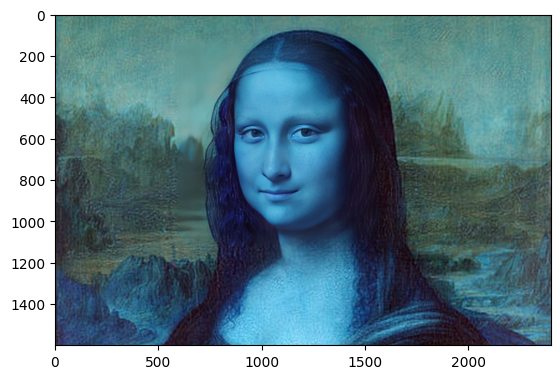

In [3]:
# cargamos imagen
img = cv.imread('./7ARBKZBF3JDNLCJOS2BJEGT6WQ.png')
plt.imshow(img)

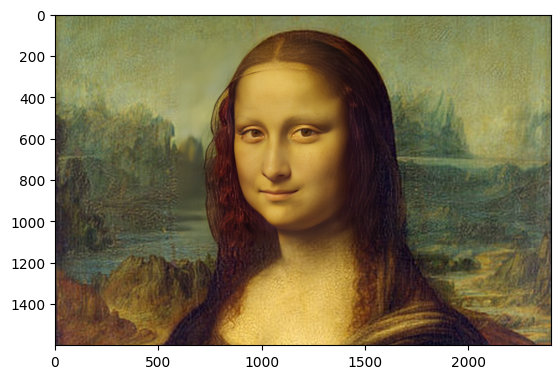

In [4]:
# acomodando colores
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [10]:
# Image size
h,w,_ = img_rgb.shape
print(f"Dimensiones de la imagen: {h} x {w}")

Dimensiones de la imagen: 1600 x 2400


Text(0.5, 1.0, 'Imgen con Desenfoque')

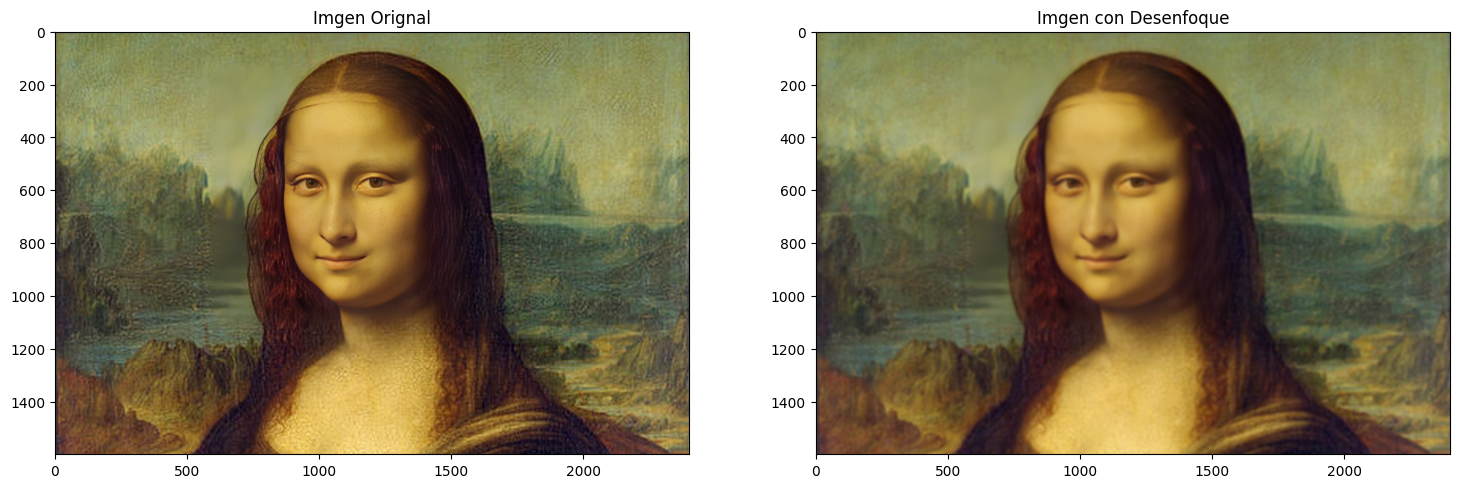

In [18]:
# filtro espacial con gauss (desenfoque)
f_espacial = cv.GaussianBlur(img_rgb, ksize=(17, 17), sigmaX=5)

figure = plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.imshow(img_rgb)
plt.title("Imgen Orignal")

ax2 = plt.subplot(222)
plt.imshow(f_espacial)
plt.title("Imgen con Desenfoque")


In [ ]:
# Para crear filtros gaussianos en el dom espectral
def create_gauss_filter(h, w, k_size, sigma):
    # Pasos:
    # Generar el kernel en el dom espacial
    kernel = cv.getGaussianKernel(k_size, sigma)

    # Agregar padding de ceros para llevar el kernel a la dim de h x w
    # padding = 

    # Luego aplicar la trans de fourier a eso
    pass